In [2]:
# Import libraries here that you need for different processing steps
import nltk
import csv
import spacy
import pandas as pd

## Loading the dataset


In [3]:
# Read the csv file into a dataframe

data_file = "./Dataset/covid.csv"

data_df = pd.read_csv(data_file)
print ("Training set: ", len(data_df))

display(data_df)

Training set:  41159


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799.0,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800.0,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801.0,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802.0,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803.0,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41154,44951.0,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41155,44952.0,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41156,44953.0,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41157,44954.0,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


## Basic Data Cleaning and Transformations

## Counting Sentiment Labels

In [4]:
# Run the cell to see the distribution of the sentiment label in the dataset

print(data_df.Sentiment.value_counts())

Positive              11422
Negative               9917
Neutral                7711
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


## Dropping Columns
Identify the column that you think is less relevant for text mining or other NLP tasks

In [5]:
data_df.drop(['ScreenName','TweetAt'],axis=1,inplace=True)
print(data_df.shape)
data_df.head(10)

(41159, 4)


,UserName,Location,OriginalTweet,Sentiment
0,3799.0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800.0,UK,advice Talk to your neighbours family to excha...,Positive
2,3801.0,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802.0,NaN,My food stock is not the only one which is emp...,Positive
4,3803.0,NaN,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804.0,"ÃT: 36.319708,-82.363649",As news of the regionÂs first confirmed COVID...,Positive
6,3805.0,"35.926541,-78.753267",Cashier at grocery store was sharing his insig...,Positive
7,3806.0,Austria,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807.0,"Atlanta, GA USA",Due to COVID-19 our retail store and classroom...,Positive
9,3808.0,"BHAVNAGAR,GUJRAT","For corona prevention,we should stop to buy th...",Negative


## Handling NULL values
Handle null values in a column by specifying the alternate value

In [6]:
filled_col_df = data_df['Sentiment'].fillna("NA")
filled_col_df


0                   Neutral
1                  Positive
2                  Positive
3                  Positive
4        Extremely Negative
                ...        
41154               Neutral
41155    Extremely Negative
41156              Positive
41157               Neutral
41158              Negative
Name: Sentiment, Length: 41159, dtype: object

In [7]:
# run this cell to fill all null values in all columns of the dataframe with the desired value. 
# Trying doing it for a single column yourself.

data_df = data_df.fillna("NA")
data_df.head()

,UserName,Location,OriginalTweet,Sentiment
0,3799.0,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800.0,UK,advice Talk to your neighbours family to excha...,Positive
2,3801.0,Vagabonds,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802.0,NA,My food stock is not the only one which is emp...,Positive
4,3803.0,NA,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Handling Exceptions
Use try-except-pass

In [8]:
# Incorporate the statements within a try-except block where you suspect there might be errors.
# In the except block, handle the exception according to the requirement.

try:
    data_df=data_df.fillna("NA")
except:
    pass

## Lowercase conversion

In [9]:
# Example showing lower case conversion of Tweet for an instance

print(data_df.OriginalTweet.tolist()[100])
print("\n")
print(data_df.OriginalTweet.tolist()[100].lower())

I hate grocery shopping in general but I swear IÂm doing it online next shop, can not deal with the swathes of panic buyers at all! #COVID?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons


i hate grocery shopping in general but i swear iâm doing it online next shop, can not deal with the swathes of panic buyers at all! #covid?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons


## Handling Special Characters or links

This should be an interesting step. You can remove special characters or links or anything that does not have value for the sentiment

In [10]:
# Example showing removal of special chars from the Tweet for an instance

import re

print(data_df.OriginalTweet.tolist()[100])
print("\n")
print(re.sub('[^A-Za-z0-9]+', ' ', data_df.OriginalTweet.tolist()[100]))

I hate grocery shopping in general but I swear IÂm doing it online next shop, can not deal with the swathes of panic buyers at all! #COVID?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons


I hate grocery shopping in general but I swear I m doing it online next shop can not deal with the swathes of panic buyers at all COVID 19 coronavirus coronavirusuk anxiety panicbuyinguk morons


## TEXT PRE-PROCESSING

The following are the techniques to tranform the data into a cleaner data. Try out the what all techniques you would apply to your textual data to get the best quality dataset for a model.
You can use either/all/addition to these steps mentioned below in any order that you find appropriate.

- Tokenization
- Sentence Segmentation

- Stemming
- Lemmatization
- PartOfSpeech Tagging
- Others


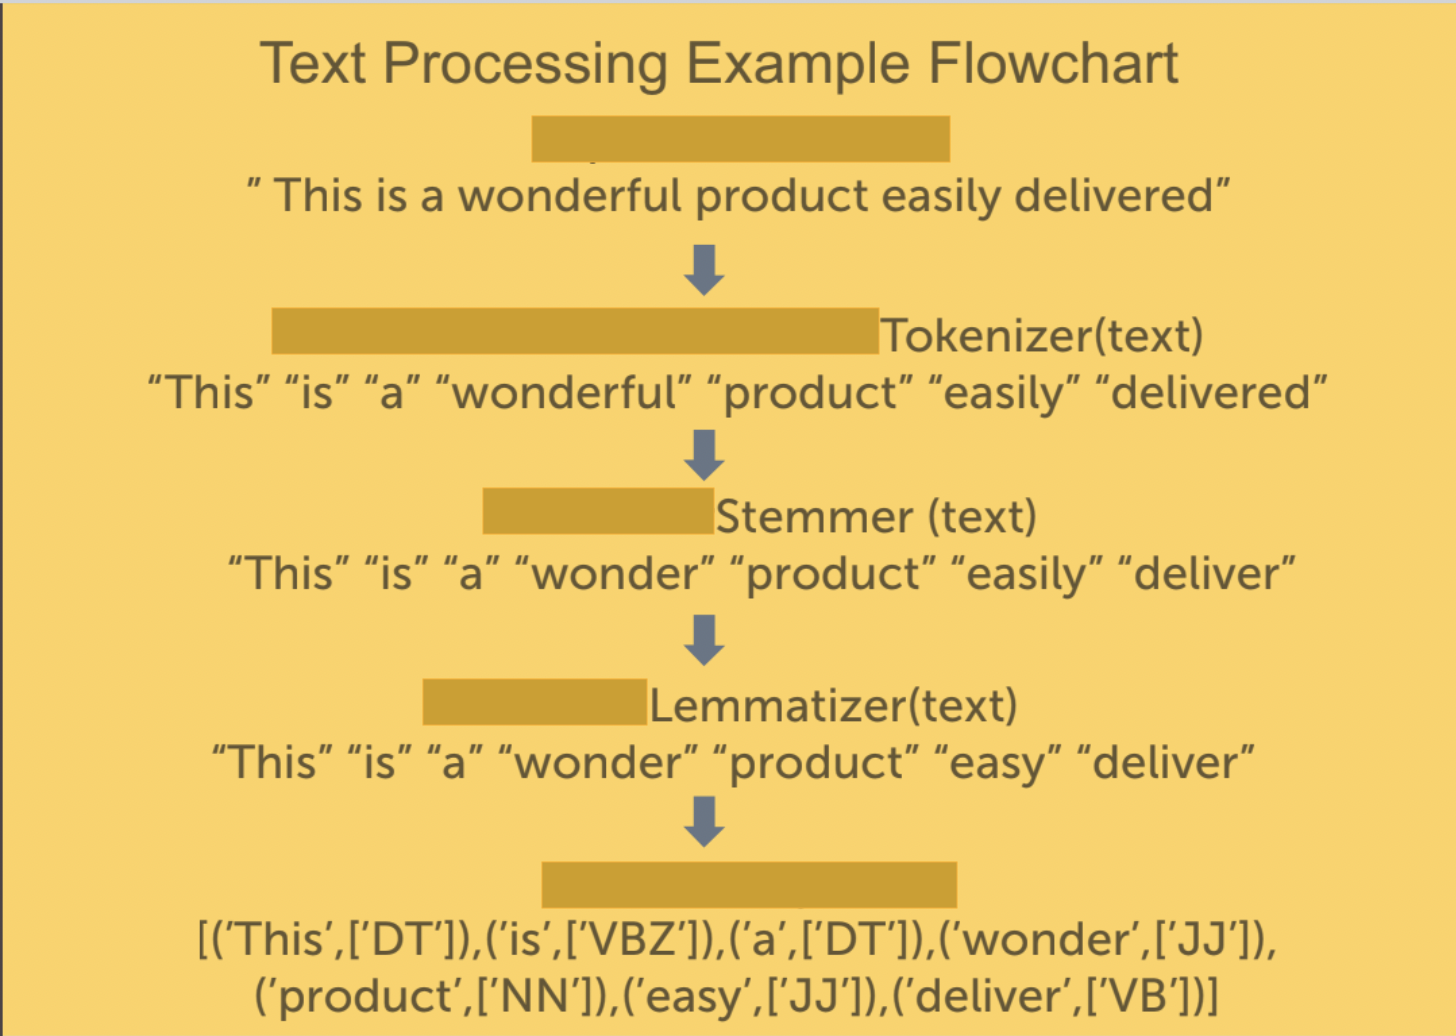

In [11]:
# Run this cell to see an example of text pre-processing including a few of these techniques. 
# This image is a hint to the pre-processing steps but may or may not be the best. 
# It shows how the input text changes with each processing step
# Find out different Tokenizers, Stemmers, Lemmatizers, etc and try to use the best one for your task! 

from PIL import Image
pil_im = Image.open('./Dataset/Text_preprocessing_example.png')
display(pil_im)

## Tokenization using nltk library
 Links to a few word and sentence tokenizers- https://www.nltk.org/howto/tokenize.html

In [12]:
# Example showing tokenization of the Tweets into words for an instance

from nltk.tokenize import word_tokenize  

print(data_df.OriginalTweet.tolist()[100])
print("\n")
print(word_tokenize(data_df.OriginalTweet.tolist()[100]))

I hate grocery shopping in general but I swear IÂm doing it online next shop, can not deal with the swathes of panic buyers at all! #COVID?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons


['I', 'hate', 'grocery', 'shopping', 'in', 'general', 'but', 'I', 'swear', 'IÂ\x92m', 'doing', 'it', 'online', 'next', 'shop', ',', 'can', 'not', 'deal', 'with', 'the', 'swathes', 'of', 'panic', 'buyers', 'at', 'all', '!', '#', 'COVID', '?', '19', '#', 'coronavirus', '#', 'coronavirusuk', '#', 'anxiety', '#', 'panicbuyinguk', '#', 'morons']


## Stemming
Links to a few nltk Stemmers- https://www.nltk.org/howto/stem.html

In [13]:
# Example showing stemming of words

from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

print(data_df.OriginalTweet.tolist()[51])
print("\n")

tweet = data_df.OriginalTweet.tolist()[51].split()

for word in tweet:
    print(word," ",ps.stem(word) ," ")

Everyone is closed, but we remain open because we are an emergency store. Thank your retail workers.



#covid_19 #pandemic #socialdistancing #retail https://t.co/WtB0B1AMON


Everyone   everyon  
is   is  
closed,   closed,  
but   but  
we   we  
remain   remain  
open   open  
because   becaus  
we   we  
are   are  
an   an  
emergency   emerg  
store.   store.  
Thank   thank  
your   your  
retail   retail  
workers.   workers.  
#covid_19   #covid_19  
#pandemic   #pandem  
#socialdistancing   #socialdistanc  
#retail   #retail  
https://t.co/WtB0B1AMON   https://t.co/wtb0b1amon  
